In [72]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [73]:
filename_in_dir = []

for root, dirs, files in os.walk('csv'):
    for  fname in files:
        full_fname = os.path.join(root, fname)
        filename_in_dir.append(full_fname)
print(len(filename_in_dir))

109


In [74]:
f = open(filename_in_dir[0],'r')
d = f.read()

In [75]:
data = d.split('\n')

In [76]:
data.pop(0)
print(data)


['AX,AY,AZ,GX,GY,GZ,speed,degree,piezoo,degreez', '-438,-163,-1282,563,0,1951,1650,143,0,468', '-235,57,-2283,709,0,927,1037,141,0,465', '282,37,-2041,300,0,190,1037,141,0,465', '98,-226,-1037,118,0,-393,1012,140,0,463', '-93,-58,-950,267,0,-788,1094,138,0,458', '-197,136,-1086,286,0,-1203,1094,138,0,458', '-176,229,-1188,35,0,-1457,914,138,0,456', '-224,336,-885,-433,0,-1495,861,138,0,453', '-401,390,-480,-548,0,-1413,861,138,0,453', '-542,366,-449,-310,0,-1199,962,138,0,453', '-544,232,-523,-39,0,-816,1215,136,0,451', '-613,235,-710,167,0,-328,1215,136,0,451', '-894,292,-831,217,0,-51,1179,134,0,450', '-814,332,-856,161,0,-128,1179,134,0,450', '-613,423,-754,136,0,-281,1354,131,0,448', '-599,493,-868,192,0,-450,1354,131,0,448', '-479,570,-1020,201,0,-665,1444,130,0,446', '-390,630,-1145,157,0,-767,1564,127,0,445', '-490,744,-1205,124,0,-825,1661,123,0,443', '-592,839,-1239,185,0,-846,1661,123,0,443', '-618,930,-1150,385,0,-788,1719,118,0,443', '-622,1088,-1009,909,0,-544,1719,118,0,4

In [77]:
index = data.pop(0)
print(data)
print(index)

['-438,-163,-1282,563,0,1951,1650,143,0,468', '-235,57,-2283,709,0,927,1037,141,0,465', '282,37,-2041,300,0,190,1037,141,0,465', '98,-226,-1037,118,0,-393,1012,140,0,463', '-93,-58,-950,267,0,-788,1094,138,0,458', '-197,136,-1086,286,0,-1203,1094,138,0,458', '-176,229,-1188,35,0,-1457,914,138,0,456', '-224,336,-885,-433,0,-1495,861,138,0,453', '-401,390,-480,-548,0,-1413,861,138,0,453', '-542,366,-449,-310,0,-1199,962,138,0,453', '-544,232,-523,-39,0,-816,1215,136,0,451', '-613,235,-710,167,0,-328,1215,136,0,451', '-894,292,-831,217,0,-51,1179,134,0,450', '-814,332,-856,161,0,-128,1179,134,0,450', '-613,423,-754,136,0,-281,1354,131,0,448', '-599,493,-868,192,0,-450,1354,131,0,448', '-479,570,-1020,201,0,-665,1444,130,0,446', '-390,630,-1145,157,0,-767,1564,127,0,445', '-490,744,-1205,124,0,-825,1661,123,0,443', '-592,839,-1239,185,0,-846,1661,123,0,443', '-618,930,-1150,385,0,-788,1719,118,0,443', '-622,1088,-1009,909,0,-544,1719,118,0,443', '-592,1127,-972,1401,0,-231,1891,115,0,443',

In [78]:
real_data = []
for x in range(len(data)):
    if data[x] == '':
        continue
    
    real_data.append(data[x].split(','))
    
print(real_data)

[['-438', '-163', '-1282', '563', '0', '1951', '1650', '143', '0', '468'], ['-235', '57', '-2283', '709', '0', '927', '1037', '141', '0', '465'], ['282', '37', '-2041', '300', '0', '190', '1037', '141', '0', '465'], ['98', '-226', '-1037', '118', '0', '-393', '1012', '140', '0', '463'], ['-93', '-58', '-950', '267', '0', '-788', '1094', '138', '0', '458'], ['-197', '136', '-1086', '286', '0', '-1203', '1094', '138', '0', '458'], ['-176', '229', '-1188', '35', '0', '-1457', '914', '138', '0', '456'], ['-224', '336', '-885', '-433', '0', '-1495', '861', '138', '0', '453'], ['-401', '390', '-480', '-548', '0', '-1413', '861', '138', '0', '453'], ['-542', '366', '-449', '-310', '0', '-1199', '962', '138', '0', '453'], ['-544', '232', '-523', '-39', '0', '-816', '1215', '136', '0', '451'], ['-613', '235', '-710', '167', '0', '-328', '1215', '136', '0', '451'], ['-894', '292', '-831', '217', '0', '-51', '1179', '134', '0', '450'], ['-814', '332', '-856', '161', '0', '-128', '1179', '134', '0

In [79]:
df = pd.DataFrame(real_data)

In [80]:
df.tail()

,0,1,2,3,4,5,6,7,8,9
55,-651,-239,-473,-20,0,269,956,138,0,440
56,-720,-113,-521,193,0,347,992,138,0,441
57,-811,-6,-562,247,0,335,1000,138,0,441
58,-807,103,-605,163,0,236,982,141,0,443
59,-732,196,-539,-13,0,208,982,141,0,443


In [81]:
index_li = index.split(',')
df.columns = index_li

In [82]:
for x in index_li:
    df[x] = pd.to_numeric(df[x],downcast='float')

In [83]:
len(df)

60

In [84]:
sample = []
for x in range(len(df)):
    tmp_li = []
    tmp_li.append(df['AX'][x])
    tmp_li.append(df['AY'][x])
    tmp_li.append(df['AZ'][x])
    sample.append(tmp_li)

In [85]:
sample

[[-438.0, -163.0, -1282.0],
 [-235.0, 57.0, -2283.0],
 [282.0, 37.0, -2041.0],
 [98.0, -226.0, -1037.0],
 [-93.0, -58.0, -950.0],
 [-197.0, 136.0, -1086.0],
 [-176.0, 229.0, -1188.0],
 [-224.0, 336.0, -885.0],
 [-401.0, 390.0, -480.0],
 [-542.0, 366.0, -449.0],
 [-544.0, 232.0, -523.0],
 [-613.0, 235.0, -710.0],
 [-894.0, 292.0, -831.0],
 [-814.0, 332.0, -856.0],
 [-613.0, 423.0, -754.0],
 [-599.0, 493.0, -868.0],
 [-479.0, 570.0, -1020.0],
 [-390.0, 630.0, -1145.0],
 [-490.0, 744.0, -1205.0],
 [-592.0, 839.0, -1239.0],
 [-618.0, 930.0, -1150.0],
 [-622.0, 1088.0, -1009.0],
 [-592.0, 1127.0, -972.0],
 [-638.0, 1212.0, -1147.0],
 [-871.0, 1094.0, -1486.0],
 [-1242.0, 643.0, -1929.0],
 [-1350.0, 35.0, -1451.0],
 [-1088.0, -206.0, -1095.0],
 [-1023.0, -231.0, -1056.0],
 [-673.0, 69.0, -836.0],
 [-437.0, 211.0, -639.0],
 [-302.0, 257.0, -557.0],
 [-215.0, 259.0, -499.0],
 [-203.0, 279.0, -507.0],
 [-202.0, 331.0, -505.0],
 [-207.0, 361.0, -518.0],
 [-201.0, 415.0, -449.0],
 [-163.0, 437.0,

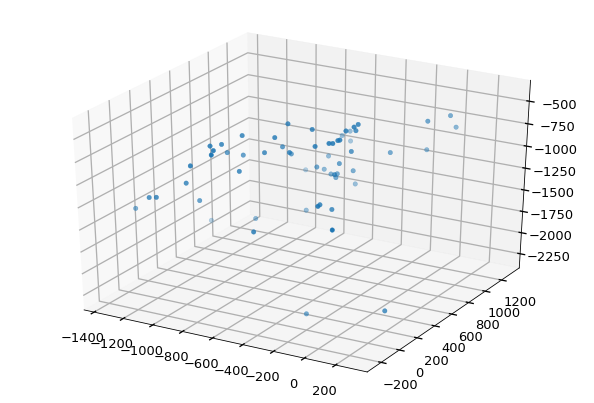

In [86]:
from mpl_toolkits.mplot3d import axes3d
plt.style.use('seaborn-talk')

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X = np.array(df['AX'])
Y = np.array(df['AY'])
Z = np.array(df['AZ'])
ax.scatter(X,Y,Z)
plt.show()

In [87]:
f = open('sample.txt','r')
data = f.read()
print(data)

675,769,92,-41,-128,83
672,771,89,-51,-144,90
668,773,87,-62,-158,96
665,774,85,-74,-171,99
659,772,89,-86,-182,100
650,770,96,-100,-195,100
642,765,107,-117,-218,96
636,760,125,-134,-241,88
635,752,155,-155,-259,75
641,739,198,-177,-266,54
670,722,258,-200,-252,17
728,699,332,-215,-215,-36
817,673,412,-213,-147,-109
920,621,517,-179,-61,-193
1043,536,631,-117,24,-250
1206,404,731,13,148,-233
1387,262,788,226,308,-129
1567,165,720,578,566,58
1660,113,557,1010,846,285
1630,97,347,1477,1037,606
1470,89,136,1851,1035,1054
1372,122,-82,2013,806,1587
1380,103,-225,2041,735,1955
1301,34,-327,1975,853,2073
1073,-31,-448,1816,1015,2032
838,-75,-590,1649,1091,1953
632,-99,-705,1513,1001,1861
492,-107,-772,1402,861,1766
401,-96,-798,1305,768,1654
315,-77,-822,1212,694,1531
240,-47,-833,1122,614,1397
179,-9,-827,1025,546,1264
132,33,-813,918,504,1132
90,74,-807,804,495,996
42,114,-806,697,488,870
-8,155,-806,608,468,762
-50,196,-806,535,436,671
-82,233,-798,479,394,594
-106,266,-785,429,354,523
-

In [88]:
data = data.split('\n')


In [89]:
data

['675,769,92,-41,-128,83',
 '672,771,89,-51,-144,90',
 '668,773,87,-62,-158,96',
 '665,774,85,-74,-171,99',
 '659,772,89,-86,-182,100',
 '650,770,96,-100,-195,100',
 '642,765,107,-117,-218,96',
 '636,760,125,-134,-241,88',
 '635,752,155,-155,-259,75',
 '641,739,198,-177,-266,54',
 '670,722,258,-200,-252,17',
 '728,699,332,-215,-215,-36',
 '817,673,412,-213,-147,-109',
 '920,621,517,-179,-61,-193',
 '1043,536,631,-117,24,-250',
 '1206,404,731,13,148,-233',
 '1387,262,788,226,308,-129',
 '1567,165,720,578,566,58',
 '1660,113,557,1010,846,285',
 '1630,97,347,1477,1037,606',
 '1470,89,136,1851,1035,1054',
 '1372,122,-82,2013,806,1587',
 '1380,103,-225,2041,735,1955',
 '1301,34,-327,1975,853,2073',
 '1073,-31,-448,1816,1015,2032',
 '838,-75,-590,1649,1091,1953',
 '632,-99,-705,1513,1001,1861',
 '492,-107,-772,1402,861,1766',
 '401,-96,-798,1305,768,1654',
 '315,-77,-822,1212,694,1531',
 '240,-47,-833,1122,614,1397',
 '179,-9,-827,1025,546,1264',
 '132,33,-813,918,504,1132',
 '90,74,-807,804

In [90]:
real_data = []
for x in range(len(data)):
    if data[x] == '':
        continue
    
    real_data.append(data[x].split(','))
    
print(real_data)

[['675', '769', '92', '-41', '-128', '83'], ['672', '771', '89', '-51', '-144', '90'], ['668', '773', '87', '-62', '-158', '96'], ['665', '774', '85', '-74', '-171', '99'], ['659', '772', '89', '-86', '-182', '100'], ['650', '770', '96', '-100', '-195', '100'], ['642', '765', '107', '-117', '-218', '96'], ['636', '760', '125', '-134', '-241', '88'], ['635', '752', '155', '-155', '-259', '75'], ['641', '739', '198', '-177', '-266', '54'], ['670', '722', '258', '-200', '-252', '17'], ['728', '699', '332', '-215', '-215', '-36'], ['817', '673', '412', '-213', '-147', '-109'], ['920', '621', '517', '-179', '-61', '-193'], ['1043', '536', '631', '-117', '24', '-250'], ['1206', '404', '731', '13', '148', '-233'], ['1387', '262', '788', '226', '308', '-129'], ['1567', '165', '720', '578', '566', '58'], ['1660', '113', '557', '1010', '846', '285'], ['1630', '97', '347', '1477', '1037', '606'], ['1470', '89', '136', '1851', '1035', '1054'], ['1372', '122', '-82', '2013', '806', '1587'], ['1380'

In [91]:
len(real_data)

47

In [92]:
df = pd.DataFrame(real_data)

In [95]:
index_li = ['AX', 'AY', 'AZ', 'GX', 'GY', 'GZ']

In [96]:
df.columns = index_li

In [97]:
df.head()

,AX,AY,AZ,GX,GY,GZ
0,675,769,92,-41,-128,83
1,672,771,89,-51,-144,90
2,668,773,87,-62,-158,96
3,665,774,85,-74,-171,99
4,659,772,89,-86,-182,100


In [98]:
for x in index_li:
    df[x] = pd.to_numeric(df[x],downcast='float')

In [99]:
sample = []
for x in range(len(df)):
    tmp_li = []
    tmp_li.append(df['AX'][x])
    tmp_li.append(df['AY'][x])
    tmp_li.append(df['AZ'][x])
    sample.append(tmp_li)

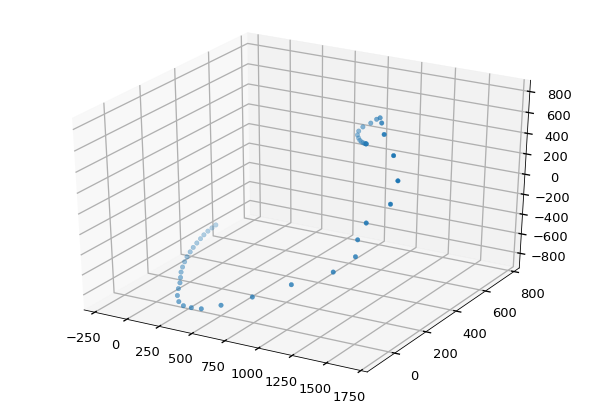

In [100]:
from mpl_toolkits.mplot3d import axes3d
plt.style.use('seaborn-talk')

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X = np.array(df['AX'])
Y = np.array(df['AY'])
Z = np.array(df['AZ'])
ax.scatter(X,Y,Z)
plt.show()

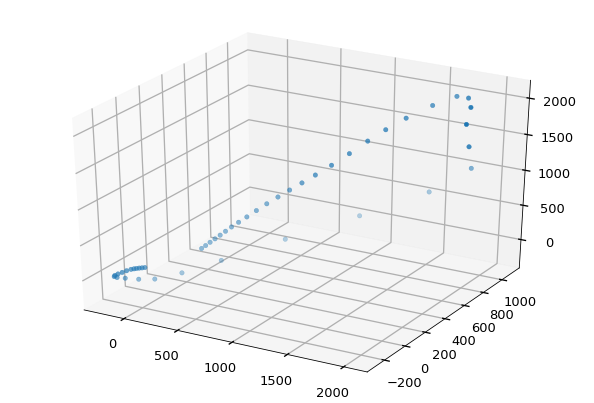

In [101]:
plt.style.use('seaborn-talk')

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X = np.array(df['GX'])
Y = np.array(df['GY'])
Z = np.array(df['GZ'])
ax.scatter(X,Y,Z)
plt.show()

RangeIndex(start=0, stop=47, step=1)


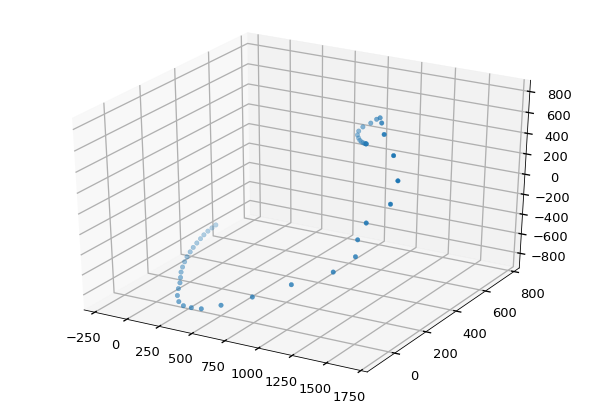

In [102]:
df_index = df.index
print(df_index)
plt.style.use('seaborn-talk')

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X = np.array(df['AX'])
Y = np.array(df['AY'])
Z = np.array(df['AZ'])
ax.scatter(X,Y,Z)
plt.show()

In [ ]:
-